<a href="https://colab.research.google.com/github/BDouchet/Spotify_dataset/blob/main/genre_classification/Tree_RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='16phKfXvRrwGbOJrNKpgbYnBnZG6icXFX'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.zip')

with ZipFile('dataset.zip', 'r') as zip:
   zip.extractall()
   print('Done')


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


df=pd.read_csv('dataset/Spotify_train_dataset.csv')

data=df.drop(labels=['type','id','uri','track_href','analysis_url','song_name'],axis=1)

genres=['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'Hiphop', 'techhouse', 'techno',
'trance', 'psytrance', 'trap', 'dnb', 'hardstyle']

le = LabelEncoder()
le.classes_=genres
data['genre']=le.transform(data['genre'])

X=data[data.columns[:-1]].to_numpy()
Y=data['genre'].to_numpy()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


Done
(25382, 13) (25382,) (6346, 13) (6346,)


# Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import graphviz

In [4]:
dt = DecisionTreeClassifier(max_depth=10, random_state=1)

dt.fit(X_train,Y_train)

y_pred = dt.predict(X_test)

f1score = f1_score(Y_test,y_pred,average='micro')

print(f1score)

0.6331547431452884


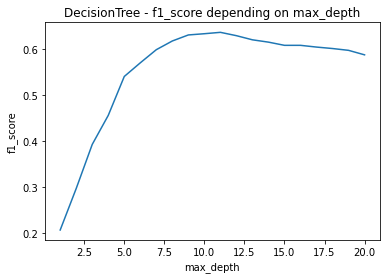

Best score = 0.6361487551213363 for max_depth = 10


In [5]:
n=20
scores=[]
x = np.arange(1,n+1)

for k in range(1,n+1):
      dt = DecisionTreeClassifier(max_depth=k, random_state=1,criterion='gini')
      dt.fit(X_train,Y_train)
      y_pred = dt.predict(X_test)
      f1score = f1_score(Y_test,y_pred,average='micro')
      scores.append(f1score)

plt.plot(x,scores,label='f1_score')
plt.title('DecisionTree - f1_score depending on max_depth')
plt.xlabel('max_depth')
plt.ylabel('f1_score')
plt.show()

print("Best score = {0} for max_depth = {1}".format(max(scores),scores.index(max(scores))))

In [12]:
#Useless because the Tree is too large to b visualized
dot_data = tree.export_graphviz(dt)
graph = graphviz.Source(dot_data)
graph.render("Tree_spotify")

'Tree_spotify.pdf'

# RandomForest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rd = RandomForestClassifier(max_depth=12, random_state=1,criterion='gini',n_estimators=700)

rd.fit(X_train,Y_train)

y_pred = rd.predict(X_test)

f1score = f1_score(Y_test,y_pred,average='micro')

print(f1score)

0.6826347305389222


## FineTuning of the Hyperparameters

*  `max_depth` : The maximum depth of the tree
*  `n_estimators` : The number of trees in the forest.

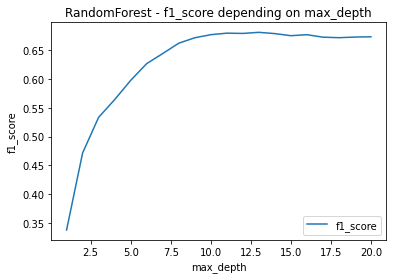

Best f1_score = 0.6810589347620548 for max_depth = 12


In [16]:
n=20
f1_scores=[]
x = np.arange(1,n+1)

for k in range(1,n+1):
      rd = RandomForestClassifier(max_depth=k, random_state=1,criterion='gini')
      rd.fit(X_train,Y_train)
      y_pred = rd.predict(X_test)
      f1score = f1_score(Y_test,y_pred,average='micro')  
      f1_scores.append(f1score)
    
plt.plot(x,f1_scores,label='f1_score')
plt.legend(loc='lower right')
plt.title('RandomForest - f1_score depending on max_depth')
plt.xlabel('max_depth')
plt.ylabel('f1_score')
plt.show()

print("Best f1_score = {0} for max_depth = {1}".format(max(f1_scores),f1_scores.index(max(f1_scores))))

Optimizing the parameters of the Random Forest with `max_depth` fixed to 12

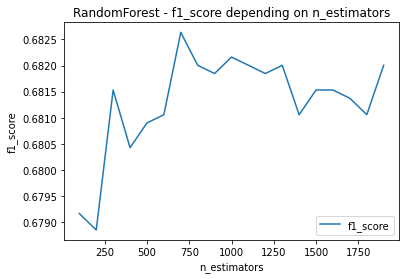

Best f1_score = 0.6826347305389222 for n_estimators = 6


In [ ]:
n=2000
f1_scores=[]
x = np.arange(100,n,100)

for val in x:
      rd = RandomForestClassifier(max_depth=12, n_estimators=val,random_state=1,criterion='gini')
      rd.fit(X_train,Y_train)
      y_pred = rd.predict(X_test)
      f1score = f1_score(Y_test,y_pred,average='micro')  
      f1_scores.append(f1score)
    
plt.plot(x,f1_scores,label='f1_score')
plt.legend(loc='lower right')
plt.title('RandomForest - f1_score depending on n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('f1_score')
plt.show()

print("Best f1_score = {0} for n_estimators = {1}".format(max(f1_scores),f1_scores.index(max(f1_scores))))

Best score obtained with `n_estimators` = 700 

## K-Fold validation



In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
rd = RandomForestClassifier(max_depth=12, random_state=1,criterion='gini',n_estimators=700)

scores = cross_val_score(rd, X, Y, cv=10)

scores

array([0.67790734, 0.66876773, 0.67916798, 0.67696187, 0.67601639,
       0.67570123, 0.68231957, 0.66876773, 0.67906683, 0.67591425])

In [19]:
#Mean of the 10 f1_score values

np.mean(scores)

0.6760590917454928